___
# PROJETO 1

## Lucas Chen Alba

## Como a renda de uma família afeta a número de moradores dela?

___
## Introdução

No Brasil um alto número de moradores em uma residência normalmente ocorre em famílias mais pobres, resultado da baixa renda familliar, consequentemente famílias com uma baixa qualidade de vida. Isso muitas vezes ocorre por falta no uso de métodos contraceptivos
Irei analisar como a renda de uma família* no intervalo de tempo de 2009 a 2015 pode afetar o número de moradores do domicílio e sua qualidade de vida. Qualidade de vida normalmente é medida quanto aos aspectos não materiais, como a felicidade ou espectativa e realidade em relação à qualidade de suas vidas, porém como não temos acesso a isso com a PNAD, irei analisar a qualidade de vida relacionada aos bens materiais, para isso foram escolhidas as seguintes variáveis, se o domicílio possui telefone móvel, microcomputador, geladeira, maquina de lavar roupa. Irei usar todo os domicílios brasileiros pesquisados pela PNAD, contabilizando os domicílios particulares permanentes, em que a renda e o número de moradores têm dados válidos.

*(foi utilizado o número de salários mínimos per capita do domicílio, para se ter um valor com referência, pois existe a inflação ao longo dos anos)

### Links que serviram de inspiração:

http://g1.globo.com/brasil/noticia/2011/04/numero-de-moradores-por-domicilio-cai-132-em-10-anos-diz-ibge.html
http://g1.globo.com/tecnologia/noticia/2015/04/mais-de-50-de-domicilios-brasileiros-tem-apenas-tv-de-tubo-diz-ibge.html

http://www.contabeis.com.br/tabelas/salario-minimo/

http://stackoverflow.com/questions/26886653/pandas-create-new-column-based-on-values-from-other-columns

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from matplotlib import pyplot

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\chend\Documents\GitHub\CD1S17\Projeto 1


In [3]:
dados2009 = pd.read_csv ('DOM2009.csv', sep = ',')

In [4]:
dados2015 = pd.read_csv ('DOM2015.csv', sep = ',')

In [5]:
dados2009 = dados2009 [(~dados2009.V0105.isnull()) & (~dados2009.V4621.isnull())]
dados2009 = dados2009 [dados2009.V0201 == 1]

dados2015 = dados2015 [(~dados2015.V0105.isnull()) & (~dados2015.V4621.isnull())]
dados2015 = dados2015 [dados2015.V0201 == 1]

In [6]:
#Montando as variáveis salariosmins de 2015 e 2009


renda2009 = dados2009.V4622.astype ('float') #Número de salários mínimos do domicílio
dados2009['salariosmins'] = dados2009.V4621/465
dados2009 = dados2009 [dados2009.salariosmins  < 15]

#dados2009.salariosmins2009 = dados2009.salariosmins2009 [dados2009.salariosmins2009 <= 13]

dados2015.V4622 = dados2015.V4622.astype ('float') #Número de salários mínimos do domicílio
dados2015['salariosmins'] = dados2015.V4621/788
dados2015 = dados2015 [dados2015.salariosmins  < 15]

#dados2015.salariosmins2015 = dados2015.salariosmins2015 [dados2015.salariosmins2015 <= 13]

In [7]:
#Montando os dataframes (novos) da população com baixa qualidade de vida

baixaquali2009 = dados2009[(dados2009.V0220 == 2) & (dados2009.V0230 == 4) & (dados2009.V0231 == 3) & (dados2009.V0228 == 2) & (dados2015.V0211 == 3)]
baixaquali2015 = dados2015[(dados2015.V0220 == 2) & (dados2015.V0230 == 4) & (dados2015.V0231 == 3) & (dados2009.V0228 == 2) & (dados2015.V0211 == 3)]


baixaquali2009['salariosmins'] = dados2009.V4621/465
baixaquali2015['salariosmins'] = dados2015.V4621/788

baixaquali2009['moradores'] = baixaquali2009.V0105
baixaquali2015['moradores'] = baixaquali2015.V0105

C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Use

In [8]:
#Montando os dataframes (novos) da população com alta qualidade de vida

altaquali2009 = dados2009[(dados2009.V0220 == 2) & (dados2009.V0230 == 2) & (dados2009.V0231 == 1) & (dados2009.V0228 == 2) & (dados2015.V0211 == 1)]
altaquali2015 = dados2015[(dados2015.V0220 == 2) & (dados2015.V0230 == 2) & (dados2015.V0231 == 1) & (dados2015.V0228 == 2) & (dados2015.V0211 == 1)]


altaquali2009['salariosmins'] = dados2009.V4621/465
altaquali2015['salariosmins'] = dados2015.V4621/788

altaquali2009['moradores'] = altaquali2009.V0105
altaquali2015['moradores'] = altaquali2015.V0105

C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  app.launch_new_instance()
C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\chend\Anaconda3\lib\site-packages\ipykernel\__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

In [11]:
#Criando databases com a variável 'quali', para análise da quantidade de pessoas nos dois níveis de qualidade de vida

quali2015 = dados2015
quali2009 = dados2009

def addquali (row):
    if row['V0220'] == 2 and row['V0230'] == 2 and row['V0231'] == 1 and row['V0228'] == 2:
        return 'alta qualidade de vida'
    else:
        return 'baixa qualidade de vida'


quali2009['quali'] = quali2009.apply (lambda row: addquali (row),axis=1)

quali2015['quali'] = quali2015.apply (lambda row: addquali (row),axis=1)

In [12]:
#Categorizando as variáveis de 2009 nos seus respectivos tipos

dados2009['moradores'] = dados2009.V0105
#moradores2009 = moradores2009 [moradores2009 > 0]

celular2009 = dados2009.V0220.astype ('category') #2 sim, 4 não
roupa2009 = dados2009.V0230.astype ('category')#2 sim, 4 não
pc2009 = dados2009.V0231.astype ('category') #1 sim, 3 não
#dvd2009 = dados2009.V2027.astype ('category') #1 sim, 3 não
#tvcolor2015 = dados2009.V0226.astype ('category') #1 sim, 3 não
geladeira2009 = dados2009.V0228.astype ('category') #2, de 2 portas, 4, de 1 porta, 6, não
agua2009 = dados2009.V0211.astype ('category') #1 sim, 3 não

In [13]:
#Categorizando as variáveis de 2015 nos seus respectivos tipos

dados2015['moradores'] = dados2015.V0105
#moradores2015 = moradores2015 [moradores2015 > 0]


celular2015 = dados2015.V0220.astype ('category') #2 sim, 4 não
roupa2015 = dados2015.V0230.astype ('category') #2 sim, 4 não
pc2015 = dados2015.V0231.astype ('category') #1 sim, 3 não
#dvd2015 = dados2015.V2027.astype ('category') #1 sim, 3 não
#tvcolor2015 = dados2015.V0226.astype ('category') #2 sim, 4 não
geladeira2015 = dados2015.V0228.astype ('category') #2, de 2 portas, 4, de 1 porta, 6, não
agua2015 = dados2015.V0211.astype ('category') #1 sim, 3 não

In [101]:
faixamoradores =  np.arange(1,13,1)
#faixacomodos =  np.arange(0,6000,100)
#faixatv =  np.arange(0,6000,100)
faixasalariosmins =  np.arange(0,10,0.25)

In [102]:
#renda2015cat = pd.cut(renda2015, faixarenda)
dados2009.moradorescat = pd.cut(dados2015.moradores, faixamoradores, False)
dados2015.moradorescat = pd.cut(dados2009.moradores, faixamoradores, False)
dados2009.salariosminscat = pd.cut(dados2015.salariosmins, faixasalariosmins, False)
dados2015.salariosminscat = pd.cut(dados2009.salariosmins, faixasalariosmins, False)



Boxplot da renda de todos os domicílios de 2009


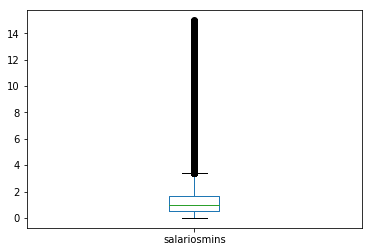

In [103]:
print()
print('Boxplot da renda de todos os domicílios de 2009')
dados2009.salariosmins.plot.box()


Boxplot da renda de todos os domicílios de 2015


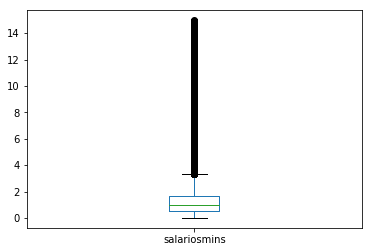

In [104]:
print()
print('Boxplot da renda de todos os domicílios de 2015')
dados2015.salariosmins.plot.box()

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000287ABF04E80>], dtype=object)

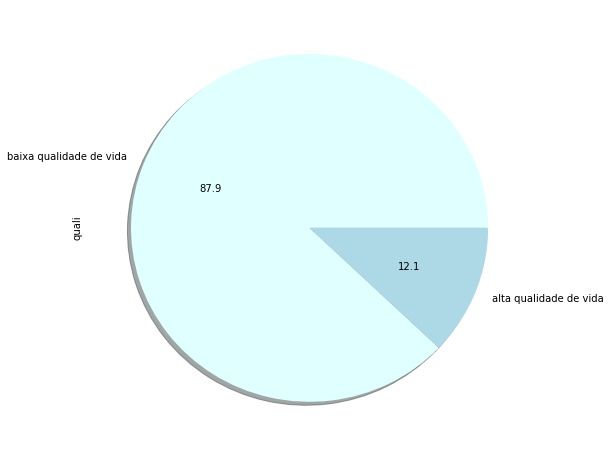

In [105]:
quali2009.quali.value_counts().plot(kind='pie', colors = ('lightcyan','lightblue'), shadow=True, autopct="%0.1f",legend=False, subplots=True, figsize=(8,8))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x00000287ABFD2C18>], dtype=object)

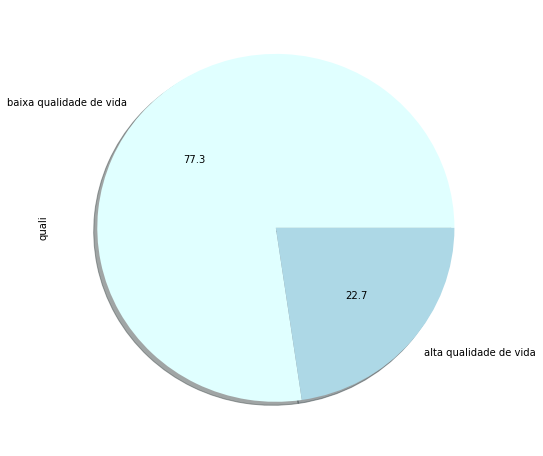

In [106]:
quali2015.quali.value_counts().plot(kind='pie', colors = ('lightcyan','lightblue'), shadow=True, autopct="%0.1f",legend=False, subplots=True, figsize=(8,8))

### Podemos perceber pela análise dos gráficos de setores de 2009 e 2015 que a população por mim considerada de alta qualidade de vida, aumentou nesse intervalo.

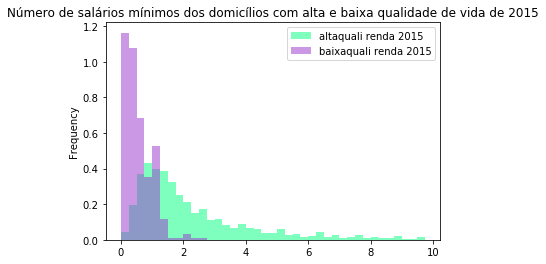

In [107]:
altaquali2015.salariosmins.plot.hist(bins = faixasalariosmins, color = "SpringGreen", label = 'altaquali renda 2015', alpha=0.5, normed = 1)
baixaquali2015.salariosmins.plot.hist(bins = faixasalariosmins, color = "DarkOrchid", label = 'baixaquali renda 2015', alpha=0.5, normed = 1)
plt.title ('Número de salários mínimos dos domicílios com alta e baixa qualidade de vida de 2015')
pyplot.legend(loc = 'best')

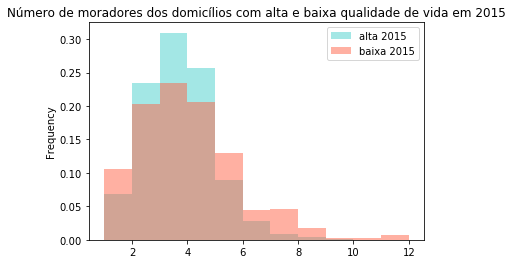

In [108]:
altaquali2015.moradores.plot.hist(bins = faixamoradores, color = "MediumTurquoise", label = 'alta 2015', alpha=0.5, normed = 1)
baixaquali2015.moradores.plot.hist(bins = faixamoradores, color = "Tomato", label = 'baixa 2015', alpha=0.5, normed = 1)
plt.title ('Número de moradores dos domicílios com alta e baixa qualidade de vida em 2015')
pyplot.legend(loc = 'best')

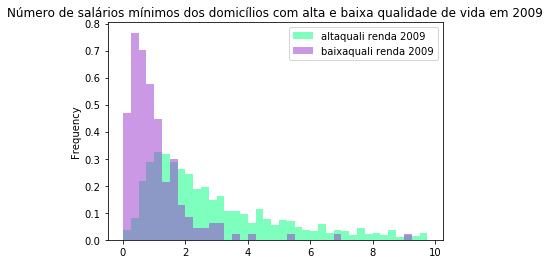

In [109]:
altaquali2009.salariosmins.plot.hist(bins = faixasalariosmins, color = "SpringGreen", label = 'altaquali renda 2009', alpha=0.5, normed = 1)
baixaquali2009.salariosmins.plot.hist(bins = faixasalariosmins, color = "DarkOrchid", label = 'baixaquali renda 2009', alpha=0.5, normed = 1)
plt.title ('Número de salários mínimos dos domicílios com alta e baixa qualidade de vida em 2009')
pyplot.legend(loc = 'best')

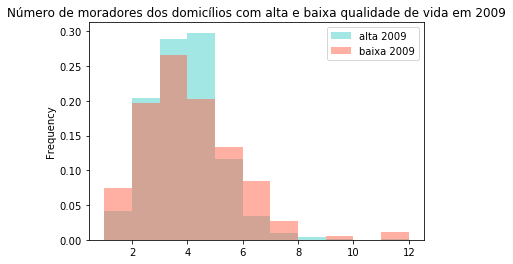

In [110]:
altaquali2009.moradores.plot.hist(bins = faixamoradores, color = "MediumTurquoise", label = 'alta 2009', alpha=0.5, normed = 1)
baixaquali2009.moradores.plot.hist(bins = faixamoradores, color = "Tomato", label = 'baixa 2009', alpha=0.5, normed = 1)
plt.title ('Número de moradores dos domicílios com alta e baixa qualidade de vida em 2009')
pyplot.legend(loc = 'best')

Coeficiente a da reta:  -0.239271264538
Coeficiente b da reta:  1.91175991273
Covariância entre salários mínimos e moradores:  -0.725327602808


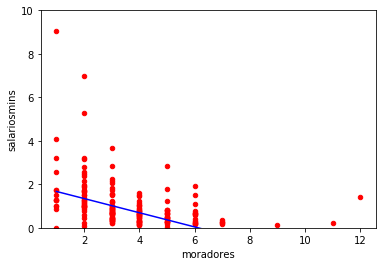

In [111]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])


    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,10])

    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)

    
    
scatter_and_line(baixaquali2009, "moradores", "salariosmins")

Coeficiente a da reta:  -0.103180954489
Coeficiente b da reta:  0.88395650549
Covariância entre salários mínimos e moradores:  -0.347980281536


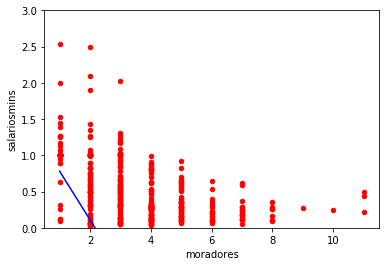

In [112]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])


    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,3])


    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)

    
    
scatter_and_line(baixaquali2015, "moradores", "salariosmins")

Coeficiente a da reta:  -0.651228497719
Coeficiente b da reta:  5.45971506649
Covariância entre salários mínimos e moradores:  -1.07971607064


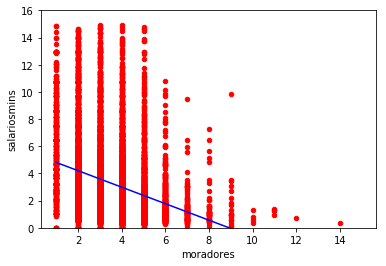

In [113]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])


    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,16])
    
    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)

    
    
scatter_and_line(altaquali2009, "moradores", "salariosmins")

Coeficiente a da reta:  -0.60846224112
Coeficiente b da reta:  4.47852977435
Covariância entre salários mínimos e moradores:  -1.00843473526


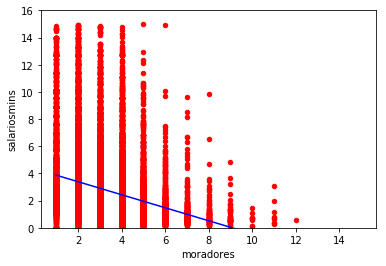

In [114]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,16])
    plt.title ('Gráfico de dispersão e ajuste de reta entre as variáveis salários mínimos e moradores dos domicílios de baixa qualidade de vida em 2009')
    
    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)


scatter_and_line(altaquali2015, "moradores", "salariosmins")

Coeficiente a da reta:  -0.239271264538
Coeficiente b da reta:  1.91175991273
Covariância entre salários mínimos e moradores:  -0.725327602808


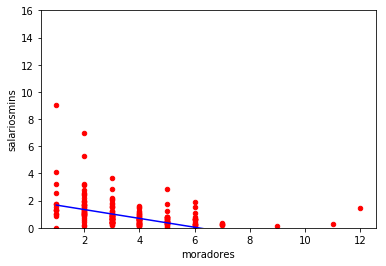

In [115]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])


    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,16])
    plt.title ('Gráfico de dispersão e ajuste de reta entre as variáveis salários mínimos e moradores dos domicílios de baixa qualidade de vida em 2009')

    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)

    
    
scatter_and_line(baixaquali2009, "moradores", "salariosmins")

Coeficiente a da reta:  -0.103180954489
Coeficiente b da reta:  0.88395650549
Covariância entre salários mínimos e moradores:  -0.347980281536


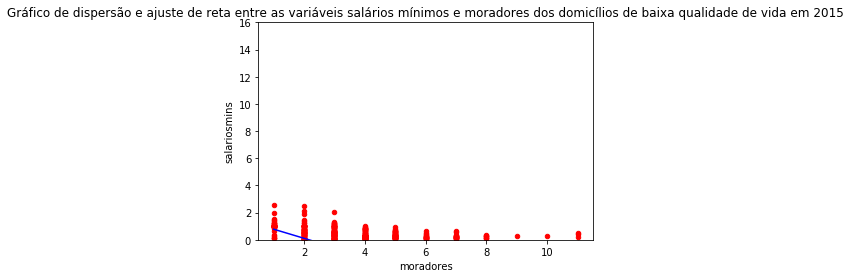

In [120]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])


    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,16])
    plt.title ('Gráfico de dispersão e ajuste de reta entre as variáveis salários mínimos e moradores dos domicílios de baixa qualidade de vida em 2015')


    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)

    
    
scatter_and_line(baixaquali2015, "moradores", "salariosmins")

Coeficiente a da reta:  -0.651228497719
Coeficiente b da reta:  5.45971506649
Covariância entre salários mínimos e moradores:  -1.07971607064


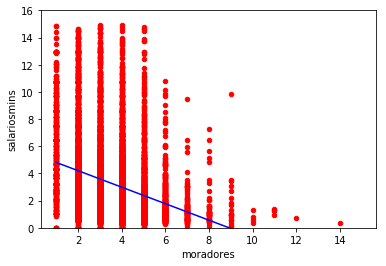

In [117]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])


    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,16])
    plt.title ('Gráfico de dispersão e ajuste de reta entre as variáveis salários mínimos e moradores dos domicílios de alta qualidade de vida em 2009')

    
    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)

    
    
scatter_and_line(altaquali2009, "moradores", "salariosmins")

Coeficiente a da reta:  -0.60846224112
Coeficiente b da reta:  4.47852977435
Covariância entre salários mínimos e moradores:  -1.00843473526


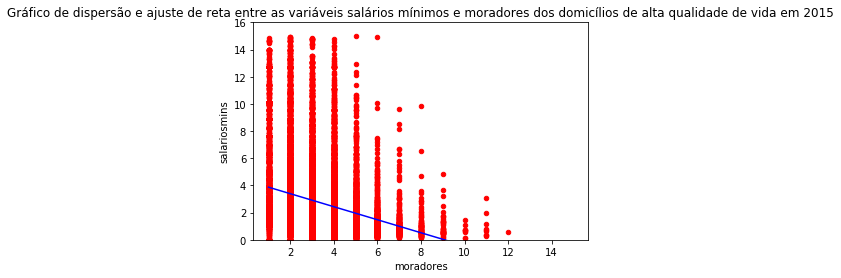

In [119]:
#Utilizando o exemplo do Fábio de ajuste de reta:

def scatter_and_line(dataframe, column1, column2):
    """ Recebe um dataframe e o nome de suas duas colunas, e faz
        o scatterplot dos dois e tenta achar a reta de tendência
    """
    a = dataframe[column1].cov(dataframe[column2]) / dataframe[column1].var()
    b = dataframe[column2].mean() - a * dataframe[column1].mean()
    cov = dataframe[column1].cov(dataframe[column2])

    dataframe.plot.scatter(x=column1, y=column2, color='red')

    plt.plot((dataframe[column1].min(), dataframe[column2].max()), (b + a * dataframe[column1].min(), b + a * dataframe[column1].max()), color='blue')
    plt.ylim([0,16])
    plt.title ('Gráfico de dispersão e ajuste de reta entre as variáveis salários mínimos e moradores dos domicílios de alta qualidade de vida em 2015')
    
    print("Coeficiente a da reta: ", a)
    print("Coeficiente b da reta: ", b)
    print("Covariância entre salários mínimos e moradores: ", cov)
    

scatter_and_line(altaquali2015, "moradores", "salariosmins")

### A partir da análise dos gráficos de dispersão e do ajuste de reta, percebemos que a variável salários mínimos por domicílio é inversamente proporcional à variável moradores por domicílio.

___
## Conclusão 

Como pudemos verificar nos gráficos de boxplot a variável renda é bastante dispersa, falando em termos da distância entre a média e a mediana dos dados, nos dando uma indicação da diferença entre a população com baixa e alta qualidade de vida. Os gráficos de moradores por domicílio nos dizem que a população de baixa renda possui sim mais domicílios com 5 a 8 moradores do que a população de alta qualidade de vida, porém no geral, não há nenhuma diferença brutal nos dados analisados. Partindo para os histogramas, percebemos que a renda da população de baixa qualidade de vida está bem mais concentrada entre 0 e 2 salários mínimos / mês, enquanto a renda da população com alta qualidade de vida se encontra bem mais dividida entre 0 e 10 salários mínimos / mês. Porém quando analisamos os grpaficos de dispersão, percebemos que acontece o contrário da renda, a população de baixa qualidade de vida tem os dados mais dispersos quando se diz em salários mínimos / moradores do domicílio, podemos comprovar isso através da covariância dos dados (salários mins e moradores), nos dados dos domicílios de alta qualidade de vida a covariância é maior, nos dizendo que a maioria está concentrada no começo do gráfico (têm poucos filhos), já nos domicílios de baixa renda a covariância é menor, nos dizendo que a população está mais distribuída no espaço de x. Com isso podemos concluir o número de moradores é bastante afetado pela renda em populações da alta qualidade de vida, e em populaões de baixa qualidade de vida é menos afetado pela renda.

*Não utilizei crosstabs pois criei datasets separados para as populações alta e baixa, extraindo os dados para plotar os gráficos direto deles, e não de um dataset conjunto.

De acordo com as referências: https://www.cartacapital.com.br/blogs/parlatorio/pessoas-pobres-tem-mais-filhos-para-receber-o-bolsa-familia-1378.html e http://www.pragmatismopolitico.com.br/2015/03/queda-no-numero-de-filhos-por-familia-e-maior-entre-os-mais-pobres.html o número de filhos por família vêm reduzindo, quebrando a tese de que famílias tem filhos para terem maior auxilio do governo com o Bolsa Família por exemplo. Nos estudos foram usados a própria, PNAD. Uma implementação futura poderia ser análisar o número de moradores utilizando como amostra as populações que recebem auxilio do governo, já que foram retiradas neste estudo.